## Pizza Delivery A/B test [mini project]

###### The Task:  
The delivery time dataset is devided in two groups: test group and control group. One group has an improved navigational algorithm another has a standard algorithm. Find out:
* if there is a statistically significant difference in the delivery time? 
* Have we improved our delivery service? 
* Should we implement the new algorithm all over our enterprise?

**Let's formulate hypothesis we'll be testing:**
* Null Hypothesis (H0) -- There is no difference in an average delivery time for the test group and the control group.  
* Alternative Hypothesis (H1) -- There is a difference in an average delivery time for the test group and the control group.

**Importing libraries**

In [17]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importing dataset from a zipped csv-file in the working directory**

In [7]:
df = pd.read_csv('experiment_lesson_4.zip', compression='zip')

df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


**Checking column names**

In [8]:
df.columns

Index(['order_id', 'delivery_time', 'district', 'experiment_group'], dtype='object')

**Columns description:**
* order_id - order id
* delivery_time - delivery time, minutes
* district - delivery neighbourhood name
* experiment_group - test or control group

**Checking columns datatypes**

In [9]:
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

**Checking for missing values**

In [10]:
df.isna().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

There is no missing values in the dataset

**Count the number of deliveries in the test and the control groups**

In [11]:
# counting the number
df.experiment_group.value_counts()

test       10104
control    10092
Name: experiment_group, dtype: int64

**Finding the difference between the number of deliveries in the control and test groups**

In [12]:
dif = np.abs(df.experiment_group.value_counts()[0] - df.experiment_group.value_counts()[1])

print(f'The difference between two groups is: {dif} deliveries.')

The difference between two groups is: 12 deliveries.


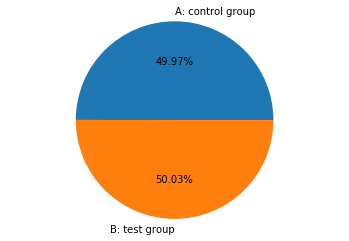

In [13]:
# grouping by group
ab_counts = df.groupby('experiment_group').count().reset_index()

# plotting two groups
plt.pie(ab_counts.district, labels=['A: control group', 'B: test group'], autopct='%0.2f%%')
plt.axis('equal');

As we can see we have (almost) equal two groups for our A/B test.

**Checking basic delivery time descriptive statistics**

In [14]:
df.delivery_time.describe()

count    20196.000000
mean        42.054169
std         10.382196
min         10.000000
25%         35.000000
50%         42.000000
75%         49.000000
max         83.000000
Name: delivery_time, dtype: float64

**Plotting distributions for test and control groups**

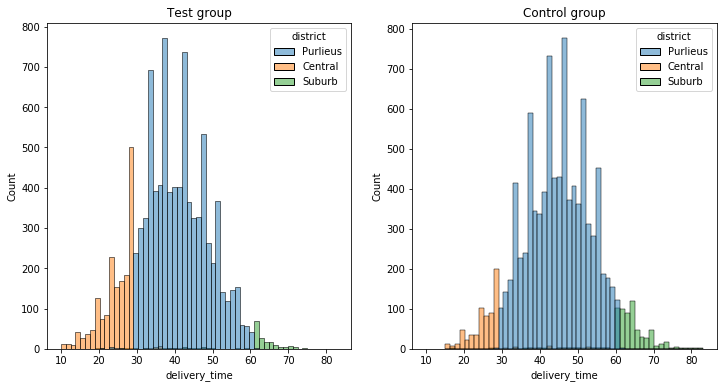

In [15]:
# setting 'canvas'
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(12, 6))
ax1.set_title('Test group')
ax2.set_title('Control group')

# plotting the test group data
sns.histplot(data=df[df['experiment_group'] == 'test'],
                  x='delivery_time', hue='district', ax=ax1);

# plotting the control group data
sns.histplot(data=df[df['experiment_group'] == 'control'],
                  x='delivery_time', hue='district', ax=ax2);

**Let's check if the data is well-suited for the t-test:**
* Both groups should have standard deviations that are close to each other;
* Both groups should have normal distribution.

In [19]:
# calculating standard deviation
std_test = df[df['experiment_group'] == 'test']['delivery_time'].std()
print(f'Standard deviation for the experiment group is: {round(std_test, 2)}')
std_control = df[df['experiment_group'] == 'control']['delivery_time'].std()
print(f'Standard deviation for the control group is: {round(std_control, 2)}')

# sampling dataset to have stable results of Shapiro-Wilk test (testing for normal distibution)
sample_test = df[df['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)
sample_control = df[df['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)

# testing for normal distribution
print('The experiment group has normal distribution.' if stats.shapiro(sample_test)[1] > 0.05 else 'Distribution is not normal!')
print('The control group has normal distribution.' if stats.shapiro(sample_control)[1] > 0.05 else 'Distribution is not normal!')

Standard deviation for the experiment group is: 9.88
Standard deviation for the control group is: 9.99
The experiment group has normal distribution.
The control group has normal distribution.


**Let's perform our A/B test**

In [29]:
# slicing dataset to have test and control groups
test_group = df[df['experiment_group'] == 'test']['delivery_time']
control_group = df[df['experiment_group'] == 'control']['delivery_time']
alpha = 0.05

# performing t-test (independent)
result = stats.ttest_ind(test_group, control_group)
t = result.statistic
p_value = result.pvalue

# printing results of the t-test
print(f"""t-score: {t}
p-value for the {(1 - alpha) * 100}% confidence interval: {p_value}
""")

# making the decision to accept or to reject the null hypothesis
if p_value < alpha: 
    print("Rejecting the null hypothesis.")
else:
    print("Acсepting the null hypothesis.")

t-score: -43.03582663183714
p-value for the 95.0% confidence interval: 0.0

Rejecting the null hypothesis.


**Calculating the difference in the delivery time**

In [363]:
# calculating percentage dif
dif = round(((test_group.mean() / control_group.mean()) -1 )*100, 2)

# printing the result
if dif < 0:
    print(f'The delivery time was reduced by {np.abs(dif)}%')
elif dif > 0:
    print(f'The delivery time was increased by {np.abs(dif)}%')
else:
    print('There were no significant difference in the delivery time.')

The delivery time was reduced by 13.35%


###### Conclusion:  
* We have rejected the null hypothesis and accepted the alternative hypothesis.
* There is a statistically significant difference in the delivery time.
* We have improved our delivery service with the new navigational algorithm.
* We should apply the new algorithm to all deliveries in our company.